In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Importing Data

In [2]:
df1 = pd.read_csv('100 leaves plant species\data_Mar_64.csv')

In [3]:
new_names_mar = dict()
new_names_mar['Column1'] = 'Species'

for i in range(1, 65):
    new_names_mar['Column' + str(i + 1)] = 'Mar' + str(i)
df1 = df1.rename(columns=new_names_mar)
df1

,Species,Mar1,Mar2,Mar3,Mar4,Mar5,Mar6,Mar7,Mar8,Mar9,...,Mar55,Mar56,Mar57,Mar58,Mar59,Mar60,Mar61,Mar62,Mar63,Mar64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.000000
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.000000
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.000000
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.000000
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zelkova Serrata,0.035156,0.027344,0.005859,0.005859,0.007812,0.027344,0.035156,0.000000,0.011719,...,0.023438,0.011719,0.013672,0.015625,0.003906,0.011719,0.000000,0.015625,0.003906,0.000000
1596,Zelkova Serrata,0.015625,0.009766,0.000000,0.001953,0.015625,0.033203,0.080078,0.000000,0.005859,...,0.056641,0.007812,0.001953,0.005859,0.007812,0.009766,0.000000,0.035156,0.003906,0.015625
1597,Zelkova Serrata,0.013672,0.005859,0.007812,0.003906,0.015625,0.013672,0.078125,0.000000,0.007812,...,0.039062,0.003906,0.013672,0.003906,0.003906,0.013672,0.000000,0.037109,0.009766,0.009766
1598,Zelkova Serrata,0.015625,0.015625,0.011719,0.000000,0.007812,0.015625,0.060547,0.000000,0.003906,...,0.050781,0.015625,0.001953,0.005859,0.000000,0.017578,0.000000,0.011719,0.003906,0.009766


In [4]:
df2 = pd.read_csv('100 leaves plant species\data_Sha_64.csv')

In [5]:
new_names_sha = dict()
new_names_sha['Column1'] = 'Species'

for i in range(1, 65):
    new_names_sha['Column' + str(i + 1)] = 'Sha' + str(i)
df2 = df2.rename(columns=new_names_sha)
df2

,Species,Sha1,Sha2,Sha3,Sha4,Sha5,Sha6,Sha7,Sha8,Sha9,...,Sha55,Sha56,Sha57,Sha58,Sha59,Sha60,Sha61,Sha62,Sha63,Sha64
0,Acer Capillipes,0.000579,0.000609,0.000551,0.000554,0.000603,0.000614,0.000611,0.000611,0.000611,...,0.000507,0.000533,0.000555,0.000565,0.000581,0.000597,0.000625,0.000624,0.000617,0.000614
1,Acer Capillipes,0.000630,0.000661,0.000719,0.000651,0.000643,0.000640,0.000646,0.000624,0.000584,...,0.000503,0.000520,0.000533,0.000564,0.000596,0.000623,0.000642,0.000661,0.000671,0.000667
2,Acer Capillipes,0.000616,0.000615,0.000606,0.000568,0.000558,0.000552,0.000551,0.000552,0.000531,...,0.000581,0.000590,0.000589,0.000566,0.000575,0.000618,0.000543,0.000592,0.000607,0.000602
3,Acer Capillipes,0.000613,0.000569,0.000564,0.000607,0.000643,0.000647,0.000663,0.000658,0.000635,...,0.000516,0.000536,0.000549,0.000542,0.000566,0.000592,0.000601,0.000609,0.000614,0.000603
4,Acer Capillipes,0.000599,0.000552,0.000558,0.000569,0.000616,0.000639,0.000631,0.000634,0.000639,...,0.000529,0.000543,0.000557,0.000562,0.000558,0.000591,0.000608,0.000613,0.000610,0.000594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zelkova Serrata,0.000740,0.000718,0.000674,0.000631,0.000579,0.000549,0.000505,0.000466,0.000449,...,0.000431,0.000481,0.000513,0.000569,0.000612,0.000663,0.000707,0.000735,0.000800,0.000740
1596,Zelkova Serrata,0.000672,0.000650,0.000643,0.000607,0.000572,0.000527,0.000501,0.000457,0.000440,...,0.000392,0.000420,0.000433,0.000469,0.000492,0.000532,0.000567,0.000605,0.000631,0.000663
1597,Zelkova Serrata,0.000701,0.000642,0.000646,0.000612,0.000569,0.000531,0.000492,0.000453,0.000427,...,0.000358,0.000396,0.000422,0.000461,0.000498,0.000538,0.000574,0.000605,0.000622,0.000663
1598,Zelkova Serrata,0.000709,0.000776,0.000716,0.000734,0.000708,0.000664,0.000618,0.000581,0.000543,...,0.000425,0.000459,0.000482,0.000500,0.000546,0.000578,0.000614,0.000650,0.000683,0.000702


In [6]:
df3 = pd.read_csv('100 leaves plant species\data_Tex_64.csv')

In [7]:
new_names_tex = dict()
new_names_tex['Column1'] = 'Species'

for i in range(1, 65):
    new_names_tex['Column' + str(i + 1)] = 'Tex' + str(i)
df3 = df3.rename(columns=new_names_tex)
df3

,Species,Tex1,Tex2,Tex3,Tex4,Tex5,Tex6,Tex7,Tex8,Tex9,...,Tex55,Tex56,Tex57,Tex58,Tex59,Tex60,Tex61,Tex62,Tex63,Tex64
0,Acer Campestre,0.025391,0.012695,0.003906,0.004883,0.039062,0.000000,0.017578,0.035156,0.023438,...,0.103520,0.0,0.001953,0.000977,0.022461,0.0,0.0,0.001953,0.000000,0.027344
1,Acer Campestre,0.004883,0.018555,0.002930,0.000000,0.069336,0.000000,0.013672,0.043945,0.026367,...,0.070312,0.0,0.017578,0.000000,0.004883,0.0,0.0,0.000000,0.000000,0.002930
2,Acer Campestre,0.018555,0.013672,0.002930,0.002930,0.051758,0.000000,0.019531,0.035156,0.022461,...,0.156250,0.0,0.008789,0.000000,0.001953,0.0,0.0,0.000000,0.000000,0.005859
3,Acer Campestre,0.035156,0.023438,0.000977,0.000000,0.061523,0.000000,0.021484,0.061523,0.010742,...,0.105470,0.0,0.026367,0.000000,0.002930,0.0,0.0,0.000000,0.000000,0.022461
4,Acer Campestre,0.038086,0.014648,0.003906,0.000977,0.046875,0.000000,0.022461,0.053711,0.019531,...,0.150390,0.0,0.002930,0.000000,0.023438,0.0,0.0,0.000000,0.000000,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Zelkova Serrata,0.005859,0.001953,0.010742,0.000977,0.015625,0.022461,0.054688,0.005859,0.038086,...,0.079102,0.0,0.008789,0.000000,0.013672,0.0,0.0,0.001953,0.024414,0.007812
1595,Zelkova Serrata,0.000977,0.001953,0.000977,0.061523,0.005859,0.000000,0.011719,0.000977,0.033203,...,0.009766,0.0,0.000000,0.004883,0.024414,0.0,0.0,0.064453,0.000000,0.003906
1596,Zelkova Serrata,0.012695,0.004883,0.006836,0.019531,0.008789,0.013672,0.067383,0.002930,0.046875,...,0.024414,0.0,0.002930,0.000977,0.022461,0.0,0.0,0.009766,0.003906,0.008789
1597,Zelkova Serrata,0.000977,0.001953,0.006836,0.009766,0.033203,0.002930,0.033203,0.005859,0.042969,...,0.079102,0.0,0.002930,0.000000,0.011719,0.0,0.0,0.016602,0.000000,0.012695


### Merging DataFrames

In [8]:
df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

In [9]:
df = pd.merge(df, df3, left_index=True, right_index=True, how='inner')

In [10]:
df

,Species_x,Mar1,Mar2,Mar3,Mar4,Mar5,Mar6,Mar7,Mar8,Mar9,...,Tex55,Tex56,Tex57,Tex58,Tex59,Tex60,Tex61,Tex62,Tex63,Tex64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.103520,0.0,0.001953,0.000977,0.022461,0.0,0.0,0.001953,0.000000,0.027344
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.070312,0.0,0.017578,0.000000,0.004883,0.0,0.0,0.000000,0.000000,0.002930
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.156250,0.0,0.008789,0.000000,0.001953,0.0,0.0,0.000000,0.000000,0.005859
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.105470,0.0,0.026367,0.000000,0.002930,0.0,0.0,0.000000,0.000000,0.022461
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.150390,0.0,0.002930,0.000000,0.023438,0.0,0.0,0.000000,0.000000,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Zelkova Serrata,0.011719,0.003906,0.007812,0.003906,0.011719,0.023438,0.023438,0.000000,0.005859,...,0.079102,0.0,0.008789,0.000000,0.013672,0.0,0.0,0.001953,0.024414,0.007812
1595,Zelkova Serrata,0.035156,0.027344,0.005859,0.005859,0.007812,0.027344,0.035156,0.000000,0.011719,...,0.009766,0.0,0.000000,0.004883,0.024414,0.0,0.0,0.064453,0.000000,0.003906
1596,Zelkova Serrata,0.015625,0.009766,0.000000,0.001953,0.015625,0.033203,0.080078,0.000000,0.005859,...,0.024414,0.0,0.002930,0.000977,0.022461,0.0,0.0,0.009766,0.003906,0.008789
1597,Zelkova Serrata,0.013672,0.005859,0.007812,0.003906,0.015625,0.013672,0.078125,0.000000,0.007812,...,0.079102,0.0,0.002930,0.000000,0.011719,0.0,0.0,0.016602,0.000000,0.012695


### Pre-processing

In [11]:
le = LabelEncoder()

In [12]:
col = []

for c in df.columns:
    col.append(c)
    
y = df[col[0]]
X = df[col[1:]]

In [13]:
le.fit(y)
species = le.classes_

In [14]:
df['Species_x'] = le.transform(y)

In [15]:
del df['Species']
del df['Species_y']

df = df.rename(columns = {'Species_x':'Species'})
df

,Species,Mar1,Mar2,Mar3,Mar4,Mar5,Mar6,Mar7,Mar8,Mar9,...,Tex55,Tex56,Tex57,Tex58,Tex59,Tex60,Tex61,Tex62,Tex63,Tex64
0,0,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.103520,0.0,0.001953,0.000977,0.022461,0.0,0.0,0.001953,0.000000,0.027344
1,0,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.070312,0.0,0.017578,0.000000,0.004883,0.0,0.0,0.000000,0.000000,0.002930
2,0,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.156250,0.0,0.008789,0.000000,0.001953,0.0,0.0,0.000000,0.000000,0.005859
3,0,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.105470,0.0,0.026367,0.000000,0.002930,0.0,0.0,0.000000,0.000000,0.022461
4,0,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.150390,0.0,0.002930,0.000000,0.023438,0.0,0.0,0.000000,0.000000,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,99,0.011719,0.003906,0.007812,0.003906,0.011719,0.023438,0.023438,0.000000,0.005859,...,0.079102,0.0,0.008789,0.000000,0.013672,0.0,0.0,0.001953,0.024414,0.007812
1595,99,0.035156,0.027344,0.005859,0.005859,0.007812,0.027344,0.035156,0.000000,0.011719,...,0.009766,0.0,0.000000,0.004883,0.024414,0.0,0.0,0.064453,0.000000,0.003906
1596,99,0.015625,0.009766,0.000000,0.001953,0.015625,0.033203,0.080078,0.000000,0.005859,...,0.024414,0.0,0.002930,0.000977,0.022461,0.0,0.0,0.009766,0.003906,0.008789
1597,99,0.013672,0.005859,0.007812,0.003906,0.015625,0.013672,0.078125,0.000000,0.007812,...,0.079102,0.0,0.002930,0.000000,0.011719,0.0,0.0,0.016602,0.000000,0.012695


### Splitting into Train and Test

In [16]:
col = []

for c in df.columns:
    col.append(c)

y_fin = df[col[0]]
X_fin= df[col[1:]]
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin)

### Create SVM and Optimise

In [17]:
clf = SVC()

In [18]:
params = {'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1, 5, 10], 'gamma': [0.01, 0.1, 1, 10]}

In [19]:
clf.fit(X_train, y_train)

SVC()

In [20]:
clf.score(X_test, y_test)

0.88

In [21]:
gsc = GridSearchCV(clf, param_grid=params)

In [22]:
grid_result = gsc.fit(X_train, y_train)

In [23]:
best_params = grid_result.best_params_


In [24]:
best_params

{'C': 5, 'gamma': 10, 'kernel': 'rbf'}

In [25]:
clf = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

In [26]:
#clf.fit(X_train, y_train)

In [27]:
#clf.score(X_test, y_test)

### Learning Curve

In [28]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_fin, y_fin, shuffle=True)

In [29]:
train_scores_mean = train_scores.mean(axis = 1)
train_scores_mean

array([1.        , 0.99903614, 0.99829303, 0.99737639, 0.99671618])

In [30]:
test_scores_mean = test_scores.mean(axis = 1)
test_scores_mean

array([0.48210423, 0.77725313, 0.84728644, 0.88605408, 0.90607171])

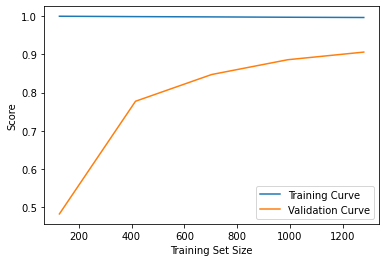

In [37]:
plt.plot(train_sizes, train_scores_mean, label='Training Curve')
plt.plot(train_sizes, test_scores_mean, label = 'Validation Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()

In [33]:
clf.fit(X_train, y_train)

SVC(C=5, gamma=10)

In [34]:
clf.score(X_test, y_test)

0.9075